## Obervations and Insights

The mean Tumor volume for mice increases a relatively strong positive corrolation compared to the weight of the mice. The corrolation co-efficient between these is 0.842. For the chosen mouse, ID w914, the drug regimen seems to have a strong effect over the time period in reducing the size from 45.00 mm3 to 36.04mm3, reducing it to 80.08% the total volume after the regimen. However a limitation of the dataset here would be that we have no idea what the units of measurements are for the timepoint column. Finally, for the four chosen Drug Regimens Capomulin, Ramicane, Infubinol, and Ceftamin, we can be fairly confident in the datasets provided as over all 4 regimens, only 1 mouse sits as an outlier in the data.

## Imports and merging the two data frames

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats
from scipy.stats import linregress
import os
image_output_dir = os.path.join(".","Image_Output")
if not os.path.exists(image_output_dir):
        os.makedirs(image_output_dir)
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Finding Duplicate Data and removing duplicate instances

In [26]:
# Checking the number of mice.
mouse_count = merge_df["Mouse ID"].nunique()

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID_data = merge_df.loc[merge_df["Mouse ID"] == duplicate_ID[0]]
duplicate_ID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Just for clarities sake, we haven't dropped the mouse's data altogether, we only dropped the duplicate information as the actual data was still valid
clean_df = merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)

In [30]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group_df = clean_df.groupby(["Drug Regimen"])
regimen_group_df.agg({"Tumor Volume (mm3)":['mean', 'median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

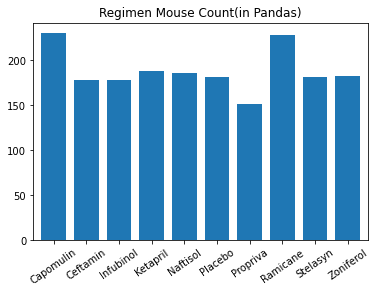

In [32]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#Pandas bar graph
mouse_count_plot = regimen_group_df["Timepoint"].count().plot(kind='bar', width=0.75)
#Dynamically adjust the ylim value based on 1.05 times the maximum value, of the plot to give some space above
y_lim = regimen_group_df["Timepoint"].count().max() * 1.05
plt.ylim(0, y_lim)
plt.xticks(rotation=35)
#Pandas wanted to automatically write the xlabel, but it's just not needed
plt.xlabel("")
plt.title("Regimen Mouse Count(in Pandas)")
plt.savefig(f"{image_output_dir}/Drug_Regimen_count_pandas")

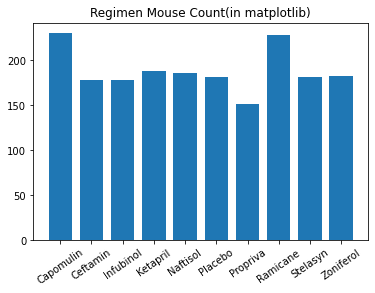

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#matplotlib bar graph
mouse_count = regimen_group_df["Timepoint"].count()
drug_names=mouse_count.index
plt.bar(drug_names,mouse_count, width=0.75)
plt.ylim(0, y_lim)
plt.title("Regimen Mouse Count(in matplotlib)")
plt.xticks(rotation=35)
#just to keep consistent with the pandas graph
plt.xlabel("")
plt.savefig(f"{image_output_dir}/Drug_Regimen_count_matplotlib")

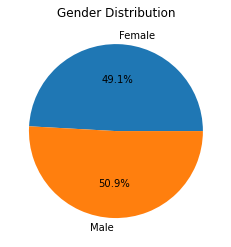

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group_df = clean_df.groupby(["Sex"])
gender_group_df['Mouse ID'].count().plot(kind='pie',autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.ylabel("")
plt.savefig(f"{image_output_dir}/Gender_comparison_pandas")

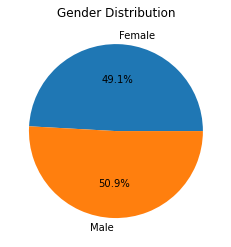

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = gender_group_df["Mouse ID"].count().index
counts = gender_group_df["Mouse ID"].count()
plt.pie(counts, labels=genders, autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.savefig(f"{image_output_dir}/Gender_comparison_matplotlib")

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") |  (clean_df["Drug Regimen"] == "Infubinol") | (clean_df["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
drug_max = pd.DataFrame(drug_df.groupby("Mouse ID")["Timepoint"].max())
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_merge = pd.merge(drug_max, clean_df, how='left', on=("Mouse ID","Timepoint")).sort_values(by="Drug Regimen")

In [37]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
drug_data = []
for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_loc = drug_merge.loc[drug_merge["Drug Regimen"] == drug]
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quarts = drug_loc["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    upperq = quarts[0.25]
    lowerq = quarts[0.75]
    # Determine outliers using upper and lower bounds
    iqr = upperq - lowerq
    lower_bound = lowerq - ( 1.5 * iqr )
    upper_bound = upperq + ( 1.5 * iqr )
    print(f"{drug}'s potential outliers lie below {round(lower_bound, 2)} and above {round(upper_bound,2)}")
    #Add dataset into the list
    drug_data.append(drug_loc["Tumor Volume (mm3)"])  
    

Capomulin's potential outliers lie below 51.83 and above 20.7
Ramicane's potential outliers lie below 54.31 and above 17.91
Infubinol's potential outliers lie below 82.74 and above 36.83
Ceftamin's potential outliers lie below 87.67 and above 25.36


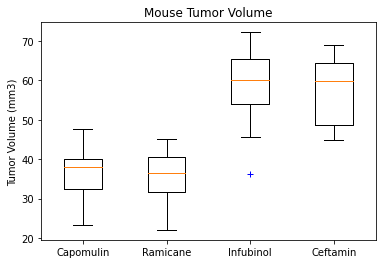

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Mouse Tumor Volume')
ax1.boxplot(drug_data, labels=drug_list, sym='b+',whis=1.5)
plt.ylabel("Tumor Volume (mm3)")
plt.savefig(f"{image_output_dir}/Tumor_Volume_regimens")

## Line and Scatter Plots

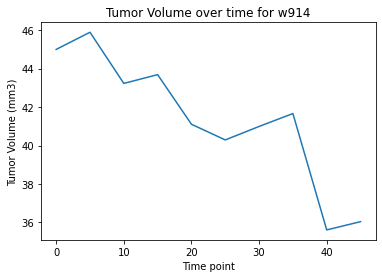

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Just for the sake of having to use this more than once
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
#Grab the name of any mouse in the Capomulin dataset. Done dynamically as a possible client may suddenly want the tumor vol/time graph for every rat in the regimen, and avoided hardcoding a mouse ID into it.
capomulin_mouse = capomulin_df["Mouse ID"].unique()[10]
capomulin_mouse_df = clean_df.loc[clean_df["Mouse ID"] == capomulin_mouse].sort_values(by="Timepoint")
cap_time = capomulin_mouse_df["Timepoint"]
cap_size = capomulin_mouse_df["Tumor Volume (mm3)"]
#Draw the plot and cusomize it
plt.plot(cap_time, cap_size)
plt.title(f"Tumor Volume over time for {capomulin_mouse}")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig(f"{image_output_dir}/Tumor_Volume_Line_graph_for_{capomulin_mouse}")

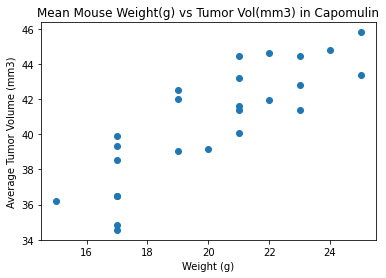

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_means = capomulin_df.groupby("Mouse ID").mean()
capomulin_weight_mean = capomulin_means["Weight (g)"]
capomulin_tumor_mean = capomulin_means["Tumor Volume (mm3)"]
plt.scatter(capomulin_weight_mean, capomulin_tumor_mean)
plt.title("Mean Mouse Weight(g) vs Tumor Vol(mm3) in Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig(f"{image_output_dir}/capomulin_weight_vs_volume_scatter")

Corrolation Co-efficient between Mouse Weight and Average Tumor Volume for the Capomulin drug regimen is 0.842
Linear regression model equation is: y = 0.9544396890241045 * x + 21.552160532685015


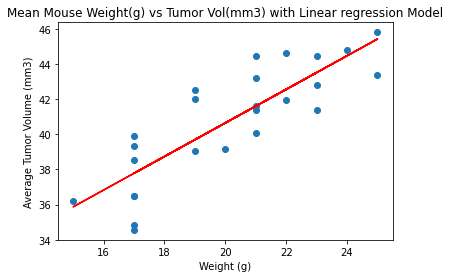

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(capomulin_weight_mean, capomulin_tumor_mean)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corrolation = round(st.pearsonr(capomulin_weight_mean,capomulin_tumor_mean)[0],3)
print(f"Corrolation Co-efficient between Mouse Weight and Average Tumor Volume for the Capomulin drug regimen is {corrolation}")
slope, intercept, _, _, _ = st.linregress(capomulin_weight_mean, capomulin_tumor_mean)

lin_regress_model_line = capomulin_weight_mean * slope + intercept
print(f"Linear regression model equation is: y = {slope} * x + {intercept}")
plt.plot(capomulin_weight_mean,lin_regress_model_line,color="red")
plt.title("Mean Mouse Weight(g) vs Tumor Vol(mm3) with Linear regression Model")
plt.savefig(f"{image_output_dir}/capomulin_weight_vs_volume_scatter_with_regression")